# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.



In [14]:
import random as rm
import numpy as np
import matplotlib.pyplot as plt

#param for gaussian distribution
mu = 2
sigma = 0.125

# Generate 5000 data points from a Gaussian dist mu = 2 and sigma = 0.125
data_points = [rm.gauss(mu, sigma) for i in range(5000)]
data_points [:10]

# bin the data into 10 bins
hist_values, bin_edges = np.histogram(data_points, bins=10)

hist_values_length = len(hist_values)
bin_edges_length = len(bin_edges)


hist_values_length, bin_edges_length, hist_values, bin_edges

(10,
 11,
 array([   3,   53,  254,  741, 1339, 1401,  835,  304,   62,    8]),
 array([1.53021398, 1.62257135, 1.71492872, 1.80728608, 1.89964345,
        1.99200081, 2.08435818, 2.17671555, 2.26907291, 2.36143028,
        2.45378764]))

*What does the `numpy.histogram` function return? Do the two arrays have the same length?*

**The two arrays do not have the same length because the bin_edges array provides the boundaries for the bins, so it always has one more value than the number of bins.**

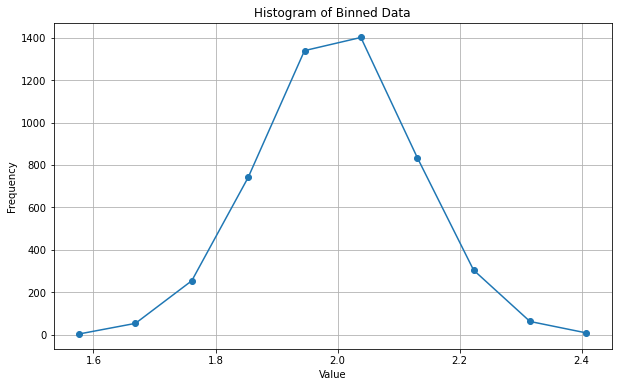

In [15]:

# Calculate the midpoints of each bin
midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Plot the binned data using the midpoints
plt.figure(figsize=(10, 6))
plt.plot(midpoints, hist_values, marker='o', linestyle='-')
plt.title("Histogram of Binned Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


*[...] deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.*

**We used the midpoints of each bin as the x-values for plotting. This ensures that the number of x-values matches the number of y-values (histogram counts). The midpoints give a more accurate representation of where the data in each bin is centered, which is why they're chosen as the x-values when plotting in this manner.**

*Binning integers*
  * *But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you.* 

*Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.* 
  * *Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.*
  * *Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution*

Minimum value: 1
Maximum value: 23
Sum over bin counts: 5000


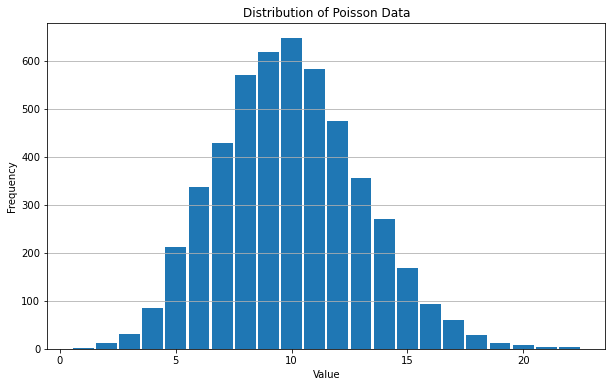

In [16]:
# Generate 5000 numbers from a poisson dist with lambda = 10
poisson_data = np.random.poisson(lam=10, size=5000)

# Find max and min value of poisson_data    
max_value = max(poisson_data)
min_value = min(poisson_data)


# Create vector for binning each integer value in its own bin
v = np.arange(min_value, max_value + 1) # +1 to include max_value in the range

# Bin vector to histogram
hist_values, bin_edges = np.histogram(poisson_data, bins=v)

# Calculate sum over bin counts
sum_of_bin_counts = sum(hist_values)

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"Sum over bin counts: {sum_of_bin_counts}")

# Plot distribution using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_values, align='center', width=0.9)
plt.title("Distribution of Poisson Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()



*Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.*

**Binning the vector's edges ensure all values from min to max are captured in the histogram.**

  *  **The first element of the binning vector corresponds to the minimum value from the Poisson distribution.**
  *  **The last element of the binning vector is max_value + 1. This ensures that the maximum value from the Poisson distribution is included within a bin, as the right edge of a bin in histograms is exclusive.**


* *Binning and plotting degree distributions.* 
  * *Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above.* 
*First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$?* 
***Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.*
  * *Now, use `networkx` to create the graph and extract the degree distribution.*
  * *Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.*

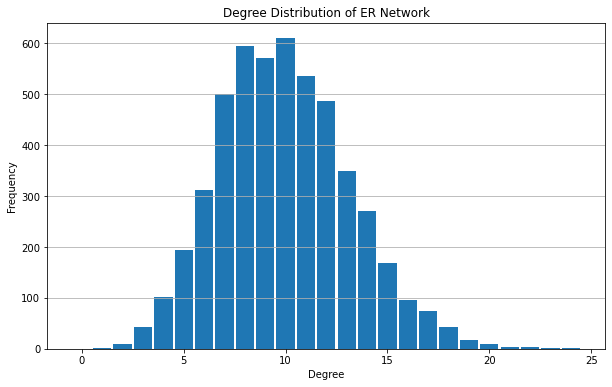

In [17]:
#Binning and plotting degree distributions
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

N = 5000
avg_degree = 10
p = avg_degree / (N - 1)

# Generate ER graph using networkx
G = nx.erdos_renyi_graph(N, p)

# Extract the degree distribution
degrees = [degree for node, degree in G.degree()]
degree_counts = np.bincount(degrees)

# Create the bins for the histogram
bins = np.arange(len(degree_counts)+1)

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], degree_counts, align='center', width=0.9)
plt.title("Degree Distribution of ER Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

### Exercise 1: Erdős-Rényi Network Properties

Consider an Erdős-Rényi network with \( N = 3,000 \) nodes, connected to each other with probability \($p = 10^{-3}$\).

1. What is the expected number of links, $\langle L \rangle$?
2. In which regime is the network?
3. Calculate the probability $p_c$ so that the network is at the critical point.
4. Given the linking probability $p = 10^{-3}$, calculate the number of nodes $N_{cr}$ so that the network has only one component.
5. For the network in (d), calculate the average degree $\langle k_{cr} \rangle$ and the average distance between two randomly chosen nodes $\langle d \rangle$.
6. Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).


1. What is the expected number of links, $\langle L \rangle$?


In [24]:
# ============ 1 ==============

N = 3000
p = 10**(-3)

# Expected number of links
expected_links = p * N * (N - 1) / 2
print("1. The expected number of links is: ", expected_links)


1. The expected number of links is:  4498.5


2. In which regime is the network?

In [25]:
# ============ 2 ==============
import numpy as np

# Average degree
avg_degree = p * (N - 1)

# Determine the regime
if avg_degree < 1:
    regime = "Subcritical"
elif avg_degree == 1:
    regime = "Critical Point"
elif avg_degree > 1 and avg_degree <= np.log(N):
    regime = "Supercritical"
else:
    regime = "Connected"

print("2. The network is in " + regime + " regime with average degree of: ", avg_degree,)


2. The network is in Supercritical regime with average degree of:  2.999


3. Calculate the probability \($ p_c$ \) so that the network is at the critical point.


In [26]:
# ============ 3 ==============

# Given number of nodes
N = 3000

# Solve for critical probability pc
pc = 1 / (N - 1)

print("3. The probability so that the network is at the critical point is: ", pc)

3. The probability so that the network is at the critical point is:  0.00033344448149383126


4. Given the linking probability \($ p = 10^{-3}$ \), calculate the number of nodes \($ N_{cr}$ \) so that the network has only one component.

In [27]:
# ============ 4 ==============

# Given probability
p = 10**(-3)

# Define the range of N values to check
N_values = np.arange(1, 10000)

# Find the smallest N that satisfies the inequality
N_cr = next((N for N in N_values if p * (N - 1) > np.log(N)), None) 

print("4. Number of nodes so that the network has only one component is: ", N_cr)



4. Number of nodes so that the network has only one component is:  9120


5. For the network in (d), calculate the average degree \($ \langle k_{cr} \rangle$ \) and the average distance between two randomly chosen nodes \($ \langle d \rangle $\).

In [28]:
# ============ 5 ==============
# Number of nodes for one component

# Average degree and average distance for N_cr
k_cr = p * (N_cr - 1)
d_avg = np.log(N_cr) / np.log(k_cr)

print("5. The average degree is: {:.3f} and the average distance: {:.4f}".format(k_cr,d_avg))

5. The average degree is: 9.119 and the average distance: 4.1252


6. Calculate the degree distribution \($ p_k$ \) of this network (approximate with a Poisson degree distribution).

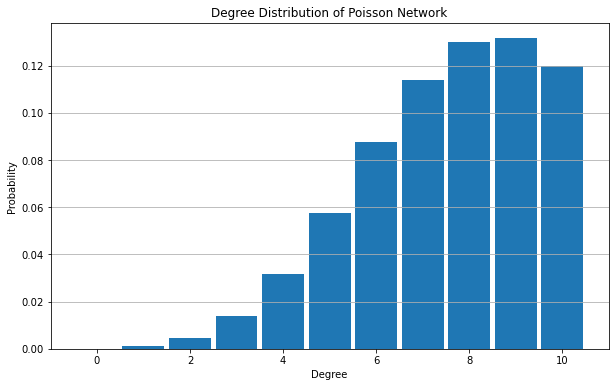

6. The degree distribution is:  [1.09564187e-04 9.99115819e-04 4.55546858e-03 1.38471060e-02
 3.15679399e-02 5.75736087e-02 8.75022897e-02 1.13990483e-01
 1.29934902e-01 1.31652930e-01 1.20054307e-01]


In [29]:
import math

# ============ 6 ==============
# Average degree
lambda_ = k_cr

# Degree values
k_values = np.arange(11)

# Poisson degree distribution
p_k = np.exp(-lambda_) * lambda_**k_values / np.vectorize(math.factorial)(k_values)

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.bar(k_values, p_k, align='center', width=0.9)
plt.title("Degree Distribution of Poisson Network")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.grid(axis='y')
plt.show()

print("6. The degree distribution is: ", p_k)

### Exercise 2: Generating Erdős-Rényi Networks

Relying on the $G(N, p)$ model, generate with a computer three networks with $N = 500$ nodes and average degree:
- (a) $\langle k \rangle = 0.8$
- (b) $\langle k \rangle = 1$
- (c) $\langle k \rangle = 8$.

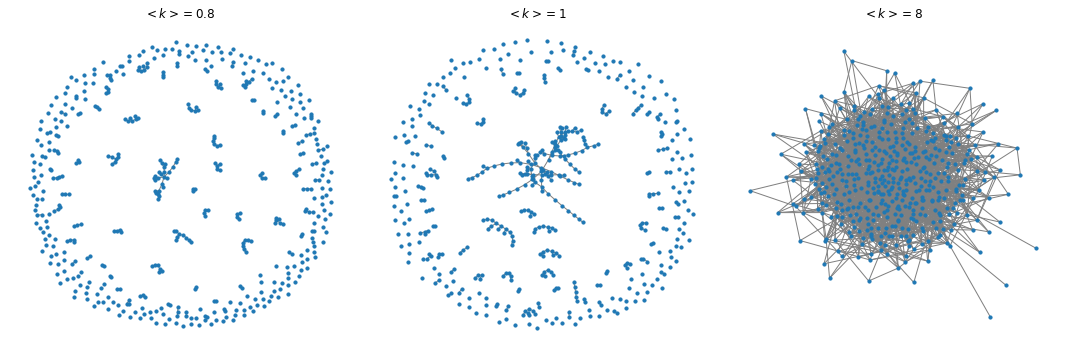

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# Number of nodes
N = 500

# Average degrees
k_values = [0.8, 1, 8]

# Linking probabilities
p_values = [k / (N - 1) for k in k_values]
p_values


# Generate networks
networks = [nx.erdos_renyi_graph(N, p) for p in p_values]

# Visualize networks
plt.figure(figsize=(15, 5))

for i, G in enumerate(networks):
    plt.subplot(1, 3, i+1)
    nx.draw(G, node_size=10, edge_color='gray')
    plt.title(f'$<k> = {k_values[i]}$')

plt.tight_layout()
plt.show()

**The figure illustrates three Erdős-Rényi networks with N=500 nodes and different average degrees: 0.8, 1, and 8. The probabilities corresponding to these average degrees are approximately 0.0016, 0.002, and 0.016 respectively. As the average degree increases, the density of edges and connections within the network visibly increases and it shows a more denser structure.**


### Exercise 3: Circle Network

Consider a network with $N$ nodes placed on a circle, so that each node connects to $m$ neighbors on either side (consequently each node has degree $2m$). Image 3.14(a) shows an example of such a network with $m = 2$ and $N = 20$.

1. Calculate the average clustering coefficient $\langle C \rangle$ of this network and the average shortest path $\langle d \rangle$.
2. For simplicity assume that $N$ and $m$ are chosen such that $\frac{n-1}{2m}$ is an integer. What happens to $\langle C \rangle$ if $N \gg 1$? And what happens to $\langle d \rangle$?


In [41]:
# Number of nodes and neighbors
N = 20
m = 2

# Average clustering coefficient
C_avg = 1 / (m - 1)

# Average shortest path
d_avg = N / (4*m)

print("1. The average clustering coefficient, C = {:.1f} and the average shortest path, d = {:.1f}".format(C_avg, d_avg))


1. The average clustering coefficient, C = 1.0 and the average shortest path, d = 2.5


2. For simplicity assume that $N$ and $m$ are chosen such that $\frac{n-1}{2m}$ is an integer. What happens to $\langle C \rangle$ if $N \gg 1$? And what happens to $\langle d \rangle$?


**As $N$ grows, the average clustering coefficient $\langle C \rangle$ remains constant, dependent only on $m$. In contrast, the average shortest path $\langle d \rangle$ increases linearly with $N$, making the network resemble a regular lattice more than a "small-world".**


### Paths. 
Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.


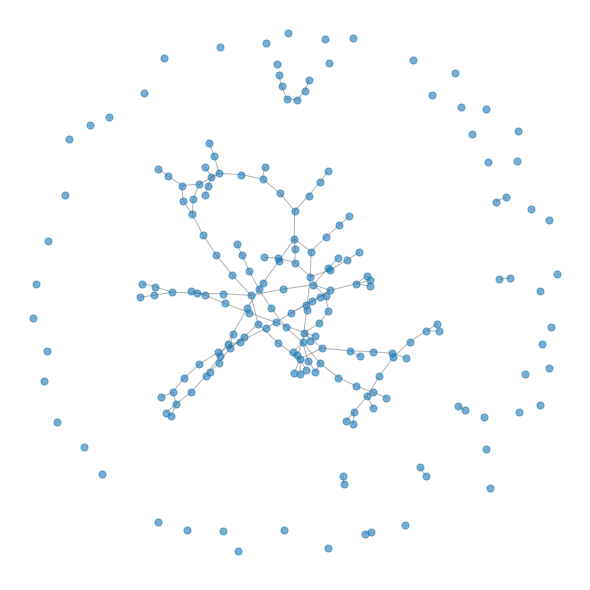

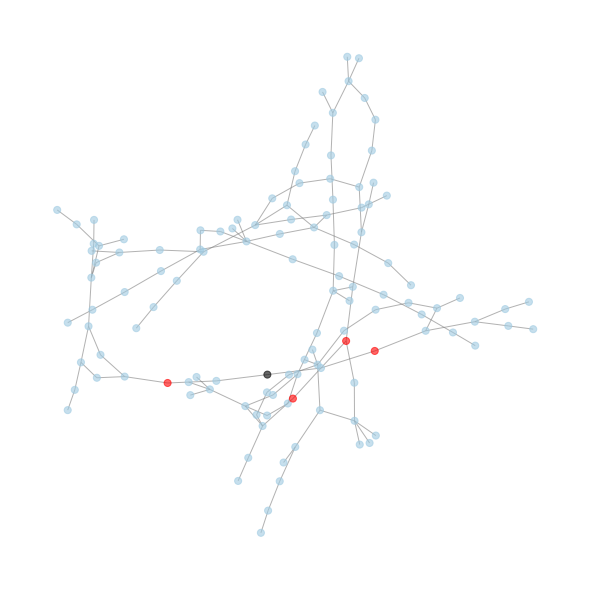

Random node: 176.00 and nodes two steps away are: [86, 186, 67, 184]


In [42]:
import random

# Define parameters 
N = 200
E = 150

# Generate random network
G = nx.gnm_random_graph(N, E)

# Draw the network
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=50, alpha=0.6, edge_color='gray')

# Extract (GCC)
GCC = max(nx.connected_components(G), key=len)
G_GCC = G.subgraph(GCC)

# Choose a node at random from the GCC
random_node = random.choice(list(G_GCC.nodes))

# Find all nodes that are precisely 2 steps away from the random node
nodes_two_steps_away = [node for node, distance in nx.single_source_shortest_path_length(G_GCC, random_node).items() if distance == 2]

# Define the colors of the nodes
node_colors = ["#A0CBE2" if node != random_node and node not in nodes_two_steps_away else "#000000" if node == random_node else "#ff0000" for node in G_GCC.nodes]

# Draw the GCC
plt.figure(figsize=(8, 8))
nx.draw(G_GCC, node_size=50, node_color=node_colors, alpha=0.6, edge_color='gray')
plt.show()

print("Random node: {:.2f} and nodes two steps away are:".format(random_node),nodes_two_steps_away)




# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

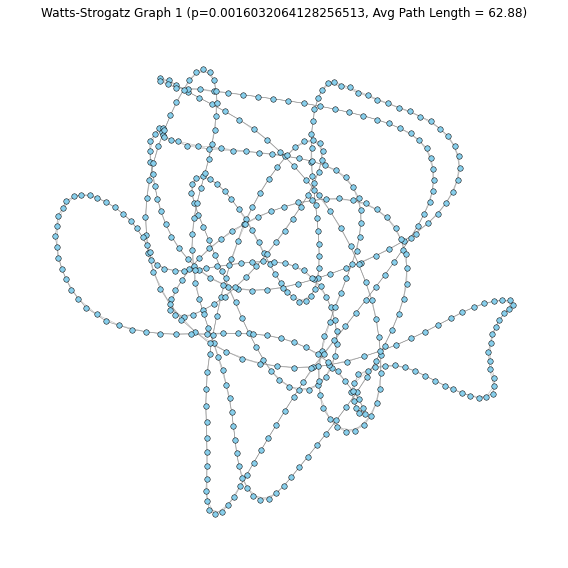

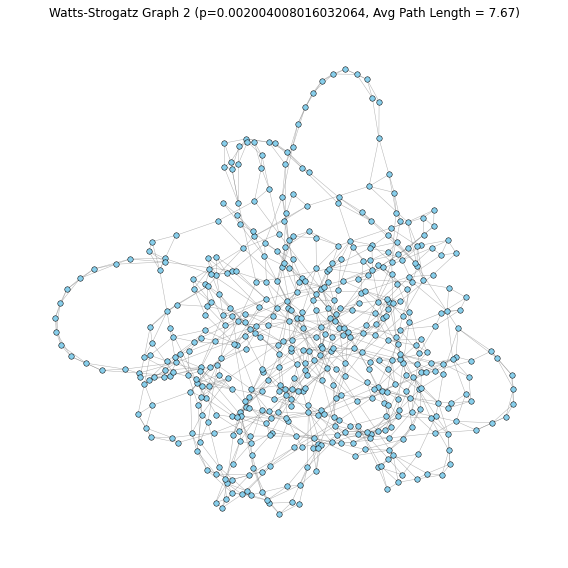

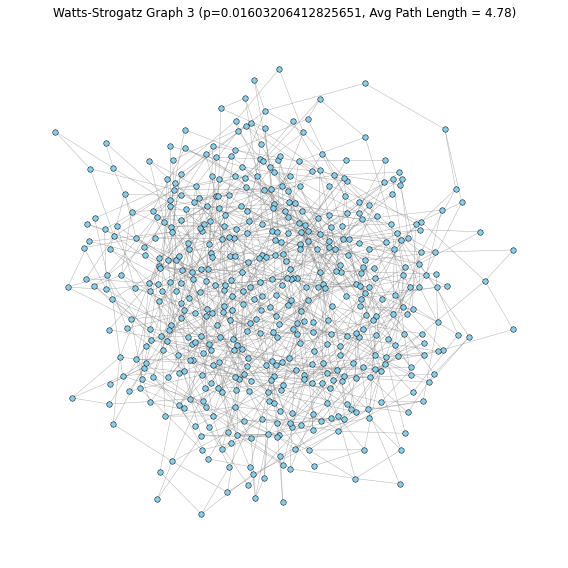

Average path lengths are:  [62.875751503006015, 7.672288577154308, 4.7750220440881765]


In [43]:
# param
n = 500
k = 4
p = [0, 0.1, 1]


# Generate 3 graphs with different p values
graphs = [nx.watts_strogatz_graph(n, k, p) for p in p]

# Lists to store average shortest path lengths
avg_path_lengths = []

# Iterate over graphs, visualize them, and compute average shortest path lengths

for i, (graph, p_val) in enumerate(zip(graphs, p_values), 1):
    plt.figure(i, figsize=(8,8))
    
    pos = nx.spring_layout(graph)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(graph, pos, node_size=30, node_color="skyblue", edgecolors="black", linewidths=0.5)
    nx.draw_networkx_edges(graph, pos, width=0.5, edge_color="grey", alpha=0.6)
    
    # Compute average shortest path length
    avg_path_length = nx.average_shortest_path_length(graph)
    avg_path_lengths.append(avg_path_length)
    
    plt.title(f"Watts-Strogatz Graph {i} (p={p_val}, Avg Path Length = {avg_path_length:.2f})")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

print("Average path lengths are: ",avg_path_lengths)



* Describe what happens to the network when $p = 1$.

**When $p = 1$ the WS model becomes fully randomized losing its structure and local clusters. Behaving similarly to an ER random graph, with uniformly distributed edges, low clustering, and a short average path length.**

[...] Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. [...].


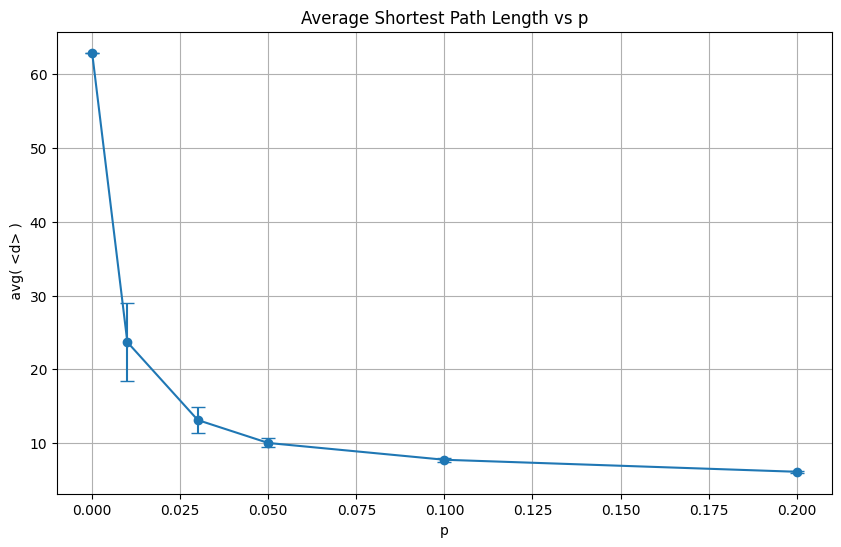

In [187]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

n = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
num_networks = 50

# Calculate average shortest path length for each p value
avg_d_values = []
std_d_values = []

for p in p_values:
    d_values = []
    
    for _ in range(num_networks):
        G = nx.watts_strogatz_graph(n, k, p)
        d = nx.average_shortest_path_length(G)
        d_values.append(d)
    
    avg_d_values.append(np.mean(d_values))
    std_d_values.append(np.std(d_values))

# Plotting the results with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(p_values, avg_d_values, yerr=std_d_values, fmt='-o', capsize=5)
plt.title("Average Shortest Path Length vs p")
plt.xlabel("p")
plt.ylabel(" avg( <d> )")
plt.grid(True)
plt.show()

**As we can observe, even a small amount of rewiring (small p) results in a significant decrease in the average shortest path length, moving the network towards the properties of a random graph. The standard deviation also reduces as p increases, indicating more consistency in the network structure with increased rewiring.**

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.


/opt/homebrew/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/var/folders/9w/0k1jwsw900bcpt3q6jvhj21w0000gn/T/ipykernel_36690/2016238292.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)


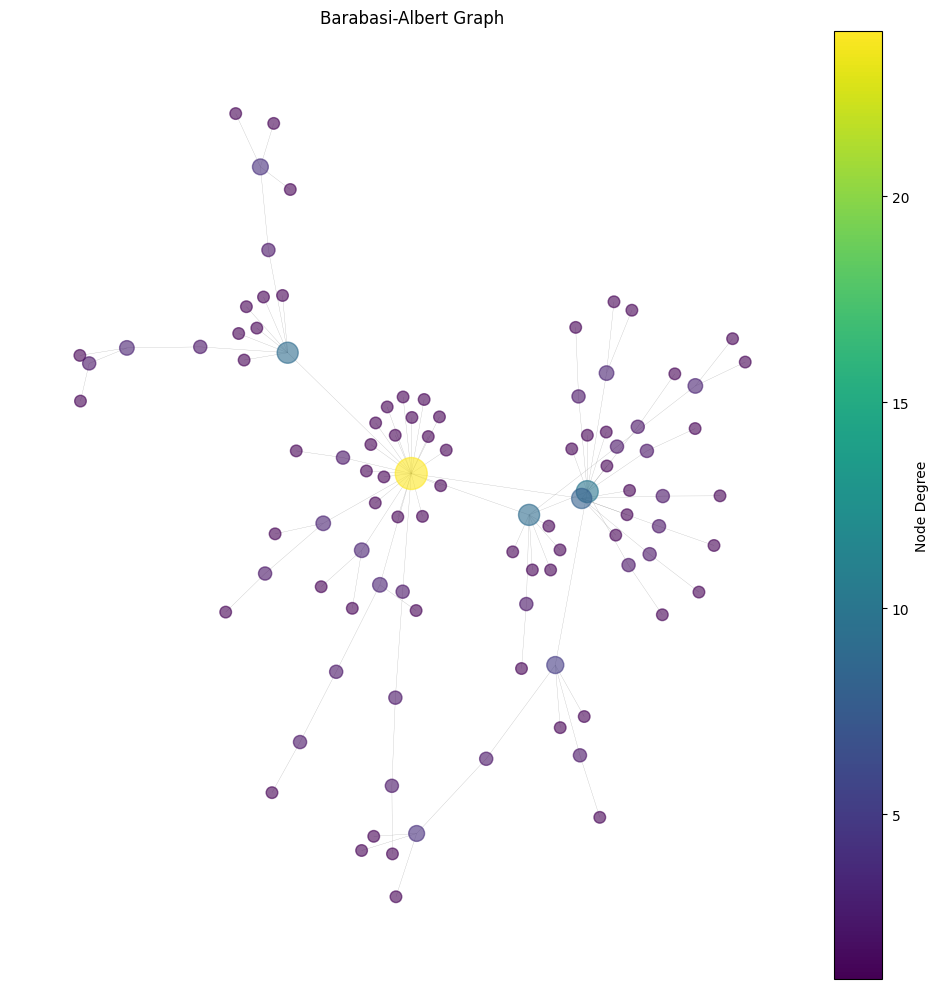

In [188]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random 

# Create graph consisting of a single link
G = nx.Graph()
G.add_edge(0,1)

# Add node connecting one of the existing nodes in proportion to their degree
G.add_node(2)
G.add_edge(0,2)

# Continue until we have 100 node network
for new_node in range(3,100):
    # Generate a list of all edges
    all_edges = list(G.edges())
    # Flatten it (remove connection information)
    flattened_edges = [item for sublist in all_edges for item in sublist]
    # Select a node from the flattened list with probability proportional to its degree
    selected_node = random.choice(flattened_edges)
    # Add a new node connecting to the selected node
    G.add_node(new_node)
    G.add_edge(new_node, selected_node)

# Nice viz :-)
# Calculate node colors based on degree
degree_sequence_100 = [d for n, d in G.degree()]
max_degree = max(degree_sequence_100)
min_degree = min(degree_sequence_100)
color_map = plt.colormaps["viridis"]
node_colors = [color_map((d - min_degree) / (max_degree - min_degree)) for d in degree_sequence_100]

# Adjust node size based on degree
node_sizes = [50 + 20 * d for d in degree_sequence_100]

plt.figure(figsize=(10,10))

# some layout
pos = nx.spring_layout(G, k=0.15)

# Draw the graph
ax = plt.gca()
nx.draw(G, pos, node_size=node_sizes, node_color=node_colors, edge_color="grey", alpha=0.6, width=0.2, cmap=color_map, ax=ax)

# Add colorbar to indicate node degrees
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)
cbar.set_label('Node Degree')

plt.title("Barabasi-Albert Graph")
plt.axis("off")
plt.tight_layout()
plt.show()


* Now create a 5000 node network.

/var/folders/9w/0k1jwsw900bcpt3q6jvhj21w0000gn/T/ipykernel_36690/4001856998.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis')


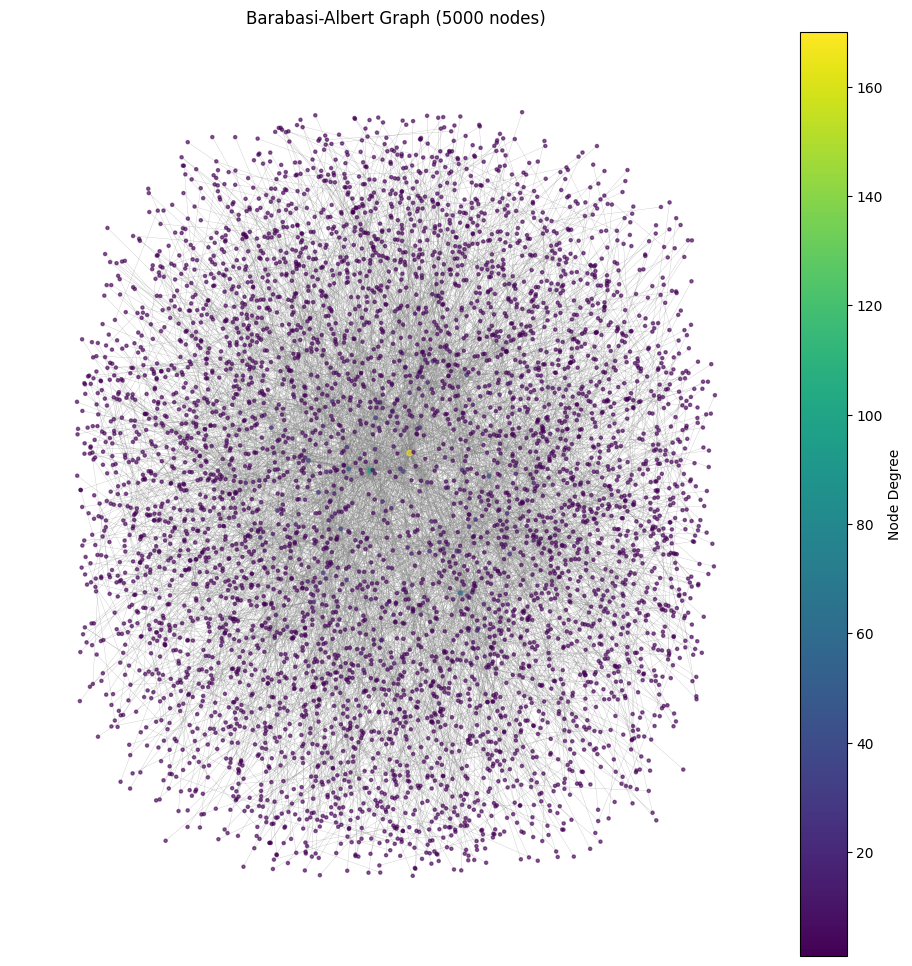

In [189]:

#Add more nodes until we have a 5000 n network.
for new_node in range(100,5000):
    #Generate a list of all edges
    all_edges = list(G.edges())

    #Flatten it (remove connection information)
    flattened_edges = [item for sublist in all_edges for item in sublist]

    # Select a node from the flattened list with probability proportional to its degree
    selected_node = random.choice(flattened_edges)
    
    # Add a new node connecting to the selected node
    G.add_node(new_node)
    G.add_edge(new_node, selected_node)

# Calculate node colors based on degree
degree_sequence_5000 = [d for n, d in G.degree()]
max_degree = max(degree_sequence_5000)
min_degree = min(degree_sequence_5000)
color_map = plt.cm.get_cmap('viridis')
node_colors = [color_map((d - min_degree) / (max_degree - min_degree)) for d in degree_sequence_5000]

# Adjust node size based on degree (smaller sizes for larger graph)
node_sizes = [5 + 10 * (d / max_degree) for d in degree_sequence_5000]

plt.figure(figsize=(12,12))

# Improved layout
pos = nx.spring_layout(G, k=0.05, iterations=10)  # Reduced iterations for faster computation

# Draw the graph and get the axis object for the colorbar
ax = plt.gca()
nx.draw(G, pos, node_size=node_sizes, node_color=node_colors, edge_color="grey", alpha=0.6, width=0.2, cmap=color_map, ax=ax)

# Add colorbar to indicate node degrees
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, ax=ax)
cbar.set_label('Node Degree')

plt.title("Barabasi-Albert Graph (5000 nodes)")
plt.axis("off")
plt.show()




  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

Max degree is 170 Min degree is 1


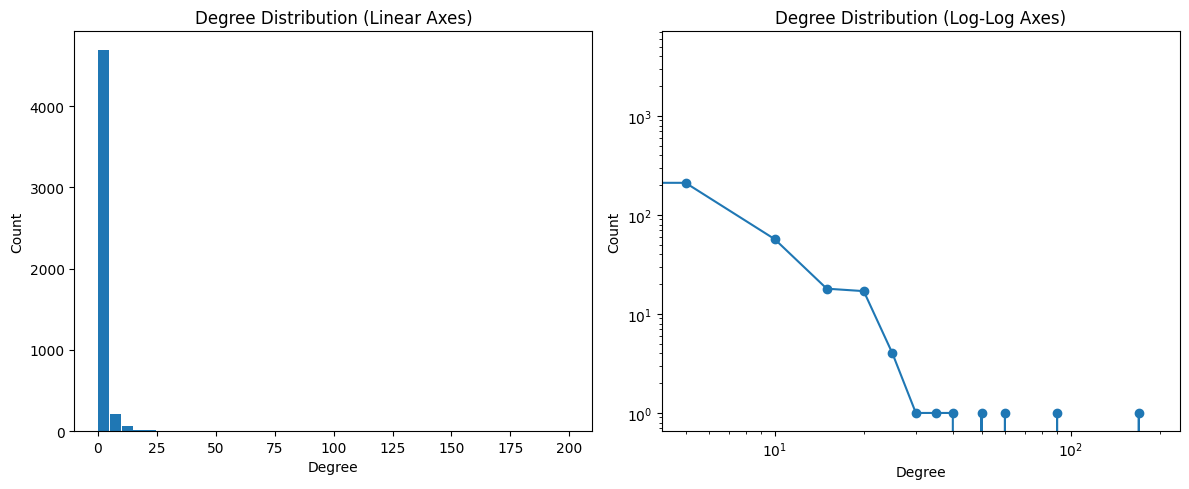

In [190]:
#calculate max and min degree
degrees = [val for (node, val) in G.degree()]  
max_degree = max(degrees)
min_degree = min(degrees)

print(f"Max degree is {max_degree} Min degree is {min_degree}")

# Bin the degree distribution using numpy.histogram
bins = np.linspace(0, 200, 41)  # Bin edges from 0 to 200 with a width of 5
hist, bin_edges = np.histogram(degrees, bins=bins)

# Plot the degree distribution with linear axes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist, width=4.8, align='edge')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution (Linear Axes)')

# Plot the degree distribution with log-log axes
plt.subplot(1, 2, 2)
plt.loglog(bin_edges[:-1], hist, 'o-')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution (Log-Log Axes)')

plt.tight_layout()
plt.show()


# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

In [191]:

#Pick a node i at random
i = random.choice(list(G.nodes()))

#Find i's neighbors. calculate their average degree
neighbors = list(G.neighbors(i))
k_i = G.degree(i)
k_avg = 0

#Compare the two values to check if its true that i's friends on average have more friends than i
for j in neighbors:
    k_avg += G.degree(j)

k_avg = k_avg / len(neighbors)

print(f"Node {i} has degree {k_i} and its neighbors have average degree {k_avg}")

#Do this 1000 times and calculate the fraction of times it is true
num_checks = 1000
num_true = 0

for _ in range(num_checks):
    i = random.choice(list(G.nodes()))
    neighbors = list(G.neighbors(i))
    k_i = G.degree(i)
    k_avg = 0

    for j in neighbors:
        k_avg += G.degree(j)

    k_avg = k_avg / len(neighbors)

    if k_avg > k_i:
        num_true += 1

print(f"Fraction of times it is true: {num_true/num_checks} or {round(num_true/num_checks*100)}% of the time")

Node 3351 has degree 2 and its neighbors have average degree 6.5
Fraction of times it is true: 0.857 or 86% of the time


**We can observe that Node 2333, with a degree of 3, has neighbors with average degree of 6.67. This observation aligns with a broader trend where 84% of nodes exhibit a similar pattern: a node's friends, on average, tend to have more connections than the node itself.**

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

    * **Barabási–Albert Network: The network has 1 connected component, meaning it is entirely connected.**
    * **Erdős–Rényi Network: The network has 826 connected components, indicating that many nodes are isolated or part of smaller disconnected clusters.**

# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

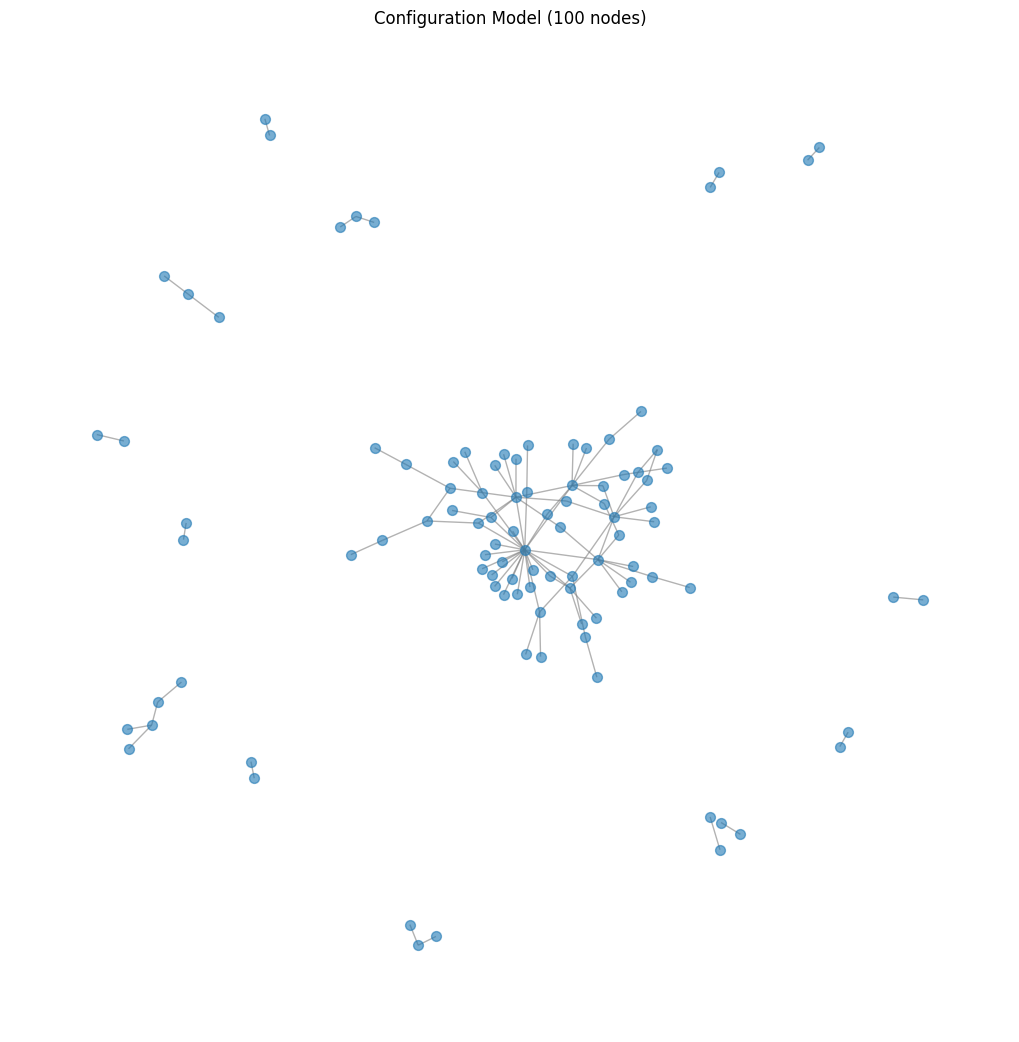

In [192]:
# Extract the degree sequence   

def configuration_model(degree_sequence_100):
    # Create a stub list
    stub_list = []
    for idx, degree in enumerate(degree_sequence_100):
        stub_list.extend([idx] * degree)

    # Initialize a new graph
    G_config = nx.Graph()

    # Add nodes to the graph
    G_config.add_nodes_from(range(len(degree_sequence_100)))

    # While there are still stubs left
    max_attempts = 1000
    while len(stub_list) > 1 and max_attempts > 0:  # We need at least 2 stubs to form an edge
        # Randomly select two stubs
        node1, node2 = random.sample(stub_list, 2)
        
        # If they can form a valid edge, add the edge and remove the stubs
        if node1 != node2 and not G_config.has_edge(node1, node2):
            G_config.add_edge(node1, node2)
            stub_list.remove(node1)
            stub_list.remove(node2)
            max_attempts = 1000  # Reset the attempts counter
        else:
            max_attempts -= 1  # Decrease the attempts counter

    return G_config

# Use algorithm
G_config_100 = configuration_model(degree_sequence_100)

# Plot graph
plt.figure(figsize=(10, 10))
nx.draw(G_config_100, node_size=50, edge_color='gray', alpha=0.6)
plt.title("Configuration Model (100 nodes)")
plt.axis("off")
plt.show()




When you compare this network to your BA network visually, what differences do you notice?
* **The Barabasi-Albert network has a more pronounced hub-and-spoke structure, where a few nodes have very high degrees and are connected to many other nodes with lower degrees. This is a characteristic of preferential attachment, which is the basis for the BA model. The configuration-model network, on the other hand, seems more random in its connections, with less pronounced hubs.**

Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.


/var/folders/9w/0k1jwsw900bcpt3q6jvhj21w0000gn/T/ipykernel_36690/2394934701.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis')


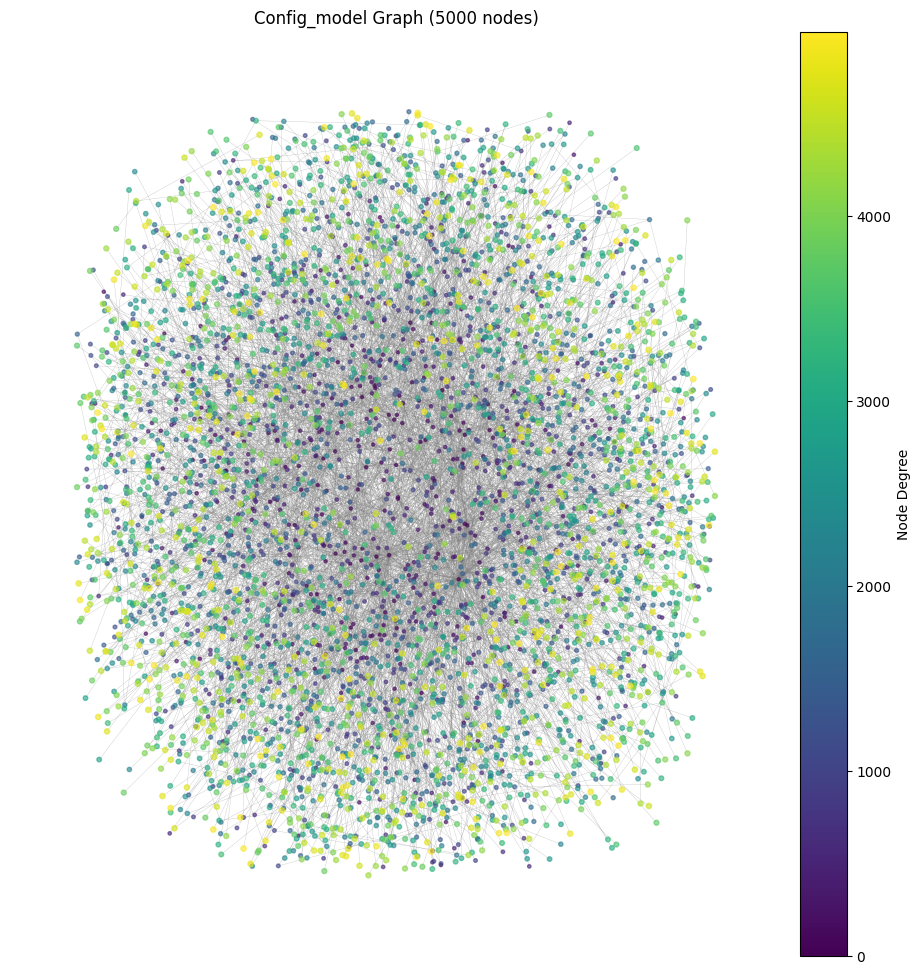

In [193]:
# Create 5000-node configuration model where half of nodes have degree 3 and the other half have degree 5
G_config_5000 = configuration_model(2500*[3] + 2500*[5])

# Calculate node colors based on degree
max_degree = max(G_config_5000)
min_degree = min(G_config_5000)
color_map = plt.cm.get_cmap('viridis')
node_colors = [color_map((d - min_degree) / (max_degree - min_degree)) for d in G_config_5000]

# Adjust node size based on degree (smaller sizes for larger graph)
node_sizes = [5 + 10 * (d / max_degree) for d in G_config_5000]

plt.figure(figsize=(12,12))

# Improved layout
pos = nx.spring_layout(G, k=0.05, iterations=10)  # Reduced iterations for faster computation

# Draw the graph and get the axis object for the colorbar
ax = plt.gca()
nx.draw(G, pos, node_size=node_sizes, node_color=node_colors, edge_color="grey", alpha=0.6, width=0.2, cmap=color_map, ax=ax)

# Add colorbar to indicate node degrees
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, ax=ax)
cbar.set_label('Node Degree')

plt.title("Config_model Graph (5000 nodes)")
plt.axis("off")
plt.show()


What should the sum of node degrees be if all nodes had degrees as described in the exercise?

Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

In [194]:
# Given data
num_nodes_half = 2500
degree_1 = 3
degree_2 = 5

# Calculate the sum of node degrees
sum_node_degrees = (num_nodes_half * degree_1) + (num_nodes_half * degree_2)
print(f"Sum of nodes degrees: {sum_node_degrees}")


Sum of nodes degrees: 20000


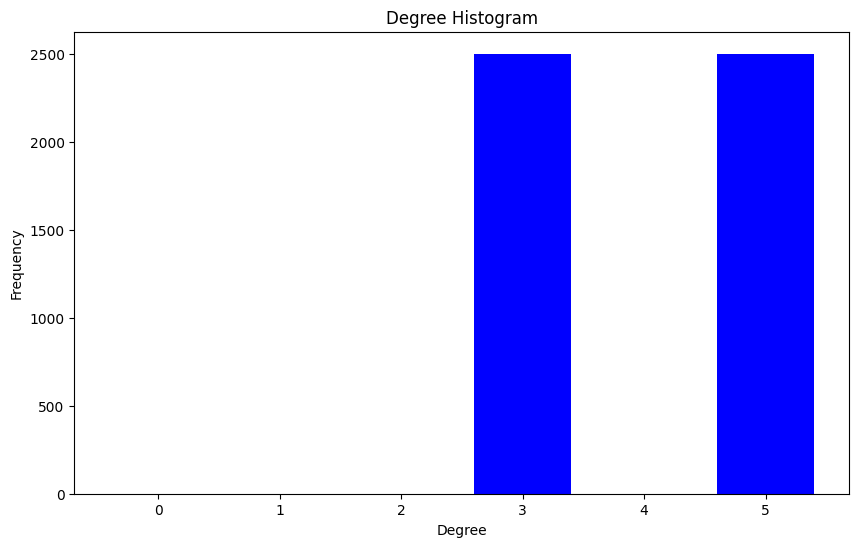

Actual sum of nodes degrees: 20000


In [195]:

# Plot the binned degree distribution
degree_freq = nx.degree_histogram(G_config_5000)
degrees = range(len(degree_freq))

plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_freq, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()

# Calculate the actual sum of node degrees in the generated graph
actual_sum_node_degrees = sum(dict(G_config_5000.degree()).values())
print(f"Actual sum of nodes degrees: {actual_sum_node_degrees}")
